## TD学習 (Temporal Difference Learning)

source : Richard S. Sutton and Andrew G.Barto, 「強化学習」

---

### 強化学習の枠組み

強化学習の枠組みは、学習と意思決定を行う「エージェント」と  
それ以外のすべてから構成される「環境」の相互作用として表される。  
  
離散的な時間ステップ　$t=0,1,...$のあるステップtにおいて、  
エージェントは環境から状態$s_{t}$を受け取り、行動$a_{t}$を選択する。  
  
このとき、状態$s_{t}$から行動$a_{t}$への写像はエージェントの方策（policy）と呼ばれ、$\pi(s,a)$で表される。  

また、エージェントは、最終的に受け取る報酬を最大化することを目標として学習する。  
一般的には期待収益（expected return）を最大化するように設定される。  
  
各時間ステップtに受け取る報酬を$r_{t}$とするとき、  
最も単純な場合には、収益$R_{t}$は  

\begin{align*}
R(t) = r_{t+1} + r_{t+2} + ... + r_{T}
\end{align*}

として表される。ここでTは最終時間ステップである。（相互作用が離散的な場合）  
  
連続タスクにおいてはT=∞となりR(t)が発散しうるため、割引収益  

\begin{align*}
R_{t} &= r_{t+1} + \gamma r_{t+2} + \gamma^{2} r_{t+3} + ... \\  
　　　&= \sum_{k=0}^{\infty}\gamma^{k} r_{t+k+1} 
\end{align*}



を最大化するようにa(t)を選択する。  
ただし、γは割引率と呼ばれるパラメータで(0<=γ<=1)である。  

---

一般的な強化学習アルゴリズムは価値関数に基づく評価を行っている。  
方策πのもとでの状態sの価値Vπ(s)は、MDP（マルコフ決定過程）では  


\begin{align*}
V^{\pi}(s) &= E_{\pi}\{R_{t} | s_{t}=s\} \\
&= E_{\pi}\{ \sum_{k=0}^{\infty}\gamma^{k}r_{t+k+1}|s_{t}=s\}
\end{align*}


と表される。関数 $ V^{\pi} $を方策πに対する状態価値観数と呼ぶ。
  
同様に、方策πのもとで状態sにおいて行動aを取ることの価値を $Q^{\pi}(s,a)$で表し、  
状態sで行動aを取り、その後に方策πに従った期待報酬として次のように定義する。  

\begin{align*}
Q^{\pi}(s,a) &= E_{\pi}\{R_{t}|s_{t}=s, a_{t}=a\} \\
&= E_{\pi}\{\sum_{k=0}^{\infty}\gamma^{k}R_{t+k+1}|s_{t}=s, a_{t}=a\}
\end{align*}


---

任意のs,aが与えられたときの次に可能な各状態s'の確率を遷移確率と呼ぶ。  

\begin{align*}
P^{a}_{ss'} = Pr\{s_{t+1}=s'| s_{t}=s, a_{t}=a\}
\end{align*}

  
同様にして、次の報酬の期待値を次のように表す。

\begin{align*}
R^{a}_{ss'}=E\{r_{t+1}| s_{t}=s, a_{t}=a, s_{t+1}=s'\}
\end{align*}

  
    
強化学習と動的計画法で使われている価値関数は、  
任意の方策πと状態sに対して、sの価値と可能な後続状態群の価値との間に  
以下の整合性条件（consistency condition）がなりたち、これを$V^{\pi}$に対するBellman方程式という。  
  

\begin{align*}
V^{\pi}(s) &= E_{\pi}\{R_{t} | s_{t}=s\} \\
&= E_{\pi}\{ \sum_{k=0}^{\infty}\gamma^{k}r_{t+k+1}|s_{t}=s\} \\
&= E_{\pi}\{r_{t+1}+ \gamma\sum_{k=0}^{\infty}\gamma^{k}r_{t+k+2}|s_{t}=s\} \\
&= \sum_{a}\pi(s,a)\sum_{s'}P^{a}_{ss'} [ R^{a}_{ss'} + \gamma E_{\pi} \{ \sum_{k=0}^{\infty}\gamma^{k}r_{t+k+2}|s_{t+1}=s'\} ] \\
&= \sum_{a}\pi(s,a)\sum_{s'}P^{a}_{ss'}[R^{a}_{ss'}+\gamma V^{\pi}(s')]
\end{align*}



---

いま、すべての状態に対して、方策πの期待収益がπ'よりも良いか同じであるなら、  
πはπ'よりも良いか、同じであると定義する。  
つまり、すべての $ s \in S $ に対して、$ V^{\pi}(s) \leqq V^{\pi'}(s) $ であるなら、その時に限り $\pi \leqq \pi'$である。
  
これが１つの最適方策であり、すべての最適方策を$\pi^{*}$と記す。  
最適方策群は最適状態価値関数 $V^{*}(s) = \max_{\pi}V^{\pi}(s)$ を共有する。    


同様に、最適方策群は最適行動価値関数 $Q^{*}(s,a)=\max_{\pi}Q^{\pi}(s,a)$ を共有する。  
$V^{*}$を用いて$Q^{*}$を次のように書くことができる。  

$$
\begin{align}
Q^{*}(s,a)=E\{r_{t+1}+\gamma V^{*}(s_{t+1})|s_{t}=s,a_{t}=a\}
\end{align}
$$

$V^{*}$に対するBellman方程式を、Bellman最適方程式という。  
  

\begin{align*}
V^{*}(s) &= \max_{a \in A(s)}Q^{\pi^{*}}(s,a) \\
&= \max_{a}E_{\pi^{*}}\{R_{t} | s_{t}=s\} \\
&= \max_{a}E_{\pi^{*}}\{ \sum_{k=0}^{\infty}\gamma^{k}r_{t+k+1}|s_{t}=s\} \\
&= \max_{a}E_{\pi^{*}}\{r_{t+1}+ \gamma\sum_{k=0}^{\infty}\gamma^{k}r_{t+k+2}|s_{t}=s\} \\
&= \max_{a}E\{r_{t+1}+\gamma V^{*}(s_{t+1})|s_{t}=s,a_{t}=a\} \\
&= \max_{a}\sum_{s'}P^{a}_{ss'}[R^{a}_{ss'}+\gamma V^{*}(s')]
\end{align*}


$Q^{*}$に対するBellman最適方程式は次の通り。

\begin{align*}
Q^{*}(s) &= E\{r_{t+1}+\gamma \max_{a'}Q^{*}(s_{t+1},a')|s_{t}=s,a_{t}=a\} \\
&= \sum_{s'}P^{a}_{ss'}[R^{a}_{ss'}+\gamma \max_{a'} Q^{*}(s',a')]
\end{align*}


---

### TD学習

TD法は経験を用いて予測問題を解決し、方策πに従って経験をいくつか得ることで  
$V^{\pi}$ の推定値$V$を更新する手法の一つである。  
  
最も単純なTD法はTD(0)と呼ばれ、以下のようになる。

\begin{align*}
V(s_{t}) \leftarrow V(s_{t}) + \alpha [ r_{t+1}+\gamma V(s_{t+1}) - V(s_{t})]
\end{align*}

ここで$\alpha$はステップサイズパラメータである。

$V^{\pi}$に対するBellman方程式より

\begin{align*}
V^{\pi}(s) &= E_{\pi}\{R_{t} | s_{t}=s\} \\
&= E_{\pi}\{r_{t+1}+ \gamma\sum_{k=0}^{\infty}\gamma^{k}r_{t+k+2}|s_{t}=s\} \\
\therefore V^{\pi}(s) &= E_{\pi}\{r_{t+1}+ \gamma V^{\pi}(s_{t+1})|s_{t}=s \}
\end{align*}


としたとき、モンテカルロ法は前者の推定値を、動的計画法は後者の推定値を目標とする。  
TD法は両者を融合させたものである。  

### テーブル型 TD(0) アルゴリズム
Algorithm
>$V(s)$を任意に初期化し、$\pi$を評価対象の方策に初期化する  
>各エピソードに対して繰り返し：  
>　　$s$を初期化  
>　　エピソードの各ステップに対して繰り返し：  
>　　　　$ a \leftarrow s $に対して$\pi$で与えられる行動  
>　　　　行動$a$を取り、報酬$r$と次状態$s'$を観測する  
>　　　　$V(s) \leftarrow V(s) + \alpha[r+\gamma V(s')-V(s)]$  
>　　　　$s \leftarrow s'$  
>　　$s$が終端状態ならば繰り返しを終了  

このTD予測法を制御問題に適用する方法について考える。

### Sarsa : 方策オン型TD制御
行動価値関数を学習するためにTD法を用いる。

Algorithm
>$Q(s,a)$を任意に初期化  
>各エピソードに対して繰り返し：  
>　　$s$を初期化  
>　　$Q$から導かれる方策（εグリーディ方策など）を用いて、$s$で取る行動$a$を選択する  
>　　エピソードの各ステップに対して繰り返し：  
>　　　　行動$a$を取り、報酬$r$と次状態$s'$を観測する  
>　　　　$Q$から導かれる方策を用いて、$s'$での行動$a'$を選択する  
>　　　　$Q(s,a) \leftarrow Q(s,a) + \alpha[r+\gamma Q(s',a')-Q(s,a)]$  
>　　　　$s \leftarrow s'; a \leftarrow a';$  
>　　$s$が終端状態ならば繰り返しを終了 

＊エージェントと環境との相互作用は離散的であり、エピソード的タスク群に分解されること、  
　および行動の集合Aと状態の集合Sは有限の要素しか持たず、  
　その数は学習開始時に既知であることを仮定する。  
＊また、テーブル型TD(0)アルゴリズムとして実装しており、  
　state(i) | i=0~nが一次元的に並べられることを前提としている。  
　policyとしてはe-greedyを用いる。  

In [1]:
class Q_table_function(object):
    def __init__(self, state_space_size, action_space_size,
                 learning_rate=0.01, discount_rate=0.95, initial_value=1,random_initial_value=True,
                 decay_learning_rate=1):
        self.state_space_size = state_space_size
        self.action_space_size = action_space_size
        self.learning_rate = learning_rate
        self.discount_rate = discount_rate
        self.initial_value = initial_value
        self.random_initial_value = random_initial_value
        self.decay_learning_rate = decay_learning_rate

        if self.random_initial_value:
            self.q_table = np.random.rand(self.state_space_size, self.action_space_size) * self.initial_value
        else:
            self.q_table = np.ones((self.state_space_size, self.action_space_size), dtype=float64) * self.initial_value

        self.last_state = None
        self.last_action = None
        
        # for debug
        #print("Q-table initialize. self.q_table = ", self.q_table)
    
    def estimate_q_value(self, state, action=None):
        # for debug
        #self.last_state, self.last_action = state, action

        if action is None:
            return self.q_table[state]
        else:
            return self.q_table[state][action]
    
    def update_q_table(self, reward, next_state, next_action,
                       last_state=None, last_action=None):
        last_state = self.last_state if last_state is None else last_state
        last_action = self.last_action if last_action is None else last_action

        delta = reward + self.discount_rate * self.estimate_q_value(next_state, next_action) \
                - self.estimate_q_value(last_state, last_action)
        self.q_table[last_state][last_action] = self.q_table[last_state][last_action] + self.learning_rate * delta

    def decay_learning_rate_value(self, decay_rate=None):
        decay_rate = self.decay_learning_rate if decay_rate is None else decay_rate
        if 0<=decay_rate<=1:
            self.learning_rate = self.learning_rate * decay_rate

    def save_q_table(self):
        return self.q_table

    def load_q_table(self, q_table=None):
        if q_table is not None:
            self.q_table = q_table

    def reset(self, reset_q_table=True, learning_rate=None, discount_rate=None, decay_learning_rate=None):
        if reset_q_table:
            if self.random_initial_value:
                self.q_table = np.random.rand(self.state_space_size, self.action_space_size) * self.initial_value
            else:
                self.q_table = np.ones((self.state_space_size, self.action_space_size), dtype=float64) * self.initial_value
        self.learning_rate = learning_rate if learning_rate is not None else self.learning_rate
        self.discount_rate = discount_rate if discount_rate is not None else self.discount_rate
        self.decay_learning_rate = decay_learning_rate if decay_learning_rate is not None else self.decay_learning_rate


In [2]:
import numpy as np
class Policy_e_greedy(object):
    def __init__(self, state_space_size, action_space_size,
                 action_count_list=None,
                 initial_play_count=None, epsilon=0.1, min_choose=1):
        self.state_space_size = state_space_size
        self.action_space_size = action_space_size
        self.total_play_count = 0
        self.min_choose = min_choose
        self.epsilon = epsilon

        self.last_state = None
        self.last_action = None

        # self.action_count_list[action] = number of [action] is choosed
        if action_count_list is None:
            self.action_count_list = np.zeros(self.action_space_size, dtype=int)
        else:
            self.action_count_list = action_count_list
        if initial_play_count is not None:
            self.total_play_count = initial_play_count

    def choose_act_greedy(self, state, value_table):
        # for debug
        #print("for choose_act_greedy, value_table = ", value_table)
        
        index_of_less_selected = np.where(self.action_count_list<self.min_choose)[0]
        #for debug
        #print("in policy.choose_act_greedy, self.action_count_list = ",self.action_count_list)
        #print("in policy.choose_act_greedy, index_of_less_selected = ",index_of_less_selected)
        
        #if index_of_less_selected[0].size == 0:
        if len(index_of_less_selected) == 0:
            #max_index = np.where(value_table == value_table.max())
            max_index = np.where(value_table == value_table.max())
            # for debug
            #print("in policy.choose_act_greedy, max_index = {0}, value_table = {1}".format(max_index, value_table))
            
            
            action = np.random.choice(max_index[0], 1)
            
            # for debug
            #print("in policy.choose_act_greedy, max_index = {0}, action = {1}".format(max_index, action))
            
        else:
            action = int(np.random.choice(index_of_less_selected, 1))
            
        return action

    def choose_act(self, state, value_table, update_flag=True, epsilon=None):
        epsilon = self.epsilon if epsilon is None else epsilon
        if np.random.choice([1, 0], p=[epsilon, 1-epsilon]):            
            action = int(np.random.choice(range(self.action_space_size)))
            
            # for debug
            #print("in policy, random choice, action = {0}".format(action))
            
        else:
            action = self.choose_act_greedy(state, value_table)
            # for debug
            #print("in policy, act_greedy, action = {0}".format(action))
            
        # for debug
        #print("in policy.choose_act(), epsilon = {0}, action = {1}".format(epsilon, action))

        self.last_state, self.last_action = state, action
        if update_flag:
            self.total_play_count += 1
            self.action_count_list[action] += 1
            
        # for debug
        #print("in policy, action = {0}".format(action))
        
        return int(action)
        #return action[0]

    def save_record(self):
        return self.action_count_list, self.total_play_count
    
    def load_record(self, action_count_list=None, total_play_count=None):
        self.action_count_list = action_count_list if action_count_list is not None else self.action_count_list
        self.total_play_count = total_play_count if total_play_count is not None else self.total_play_count
    
    def reset_record(self, reset_count=True, reset_last=True):
        if reset_count:
            self.total_play_count = 0
            self.action_count_list = np.zeros(self.action_space_size, dtype=int)
        if reset_last:
            self.last_state = None
            self.last_action = None

In [3]:
class Agent_SARSA(object):
    def __init__(self, state_space_size, action_space_size,
                 state_function, q_function=None, policy_function=None,
                 learning_rate=0.01, discount_rate=0.95, 
                 initial_value=1, random_initial_value=True, decay_learning_rate=1,
                 action_count_list=None, initial_play_count=None, epsilon=0.1, min_choose=1):
        self.state_space_size = state_space_size
        self.action_space_size = action_space_size
        self.learning_rate = learning_rate
        self.discount_rate = discount_rate
        self.initial_value = initial_value
        self.random_initial_value = random_initial_value
        self.decay_learning_rate = decay_learning_rate
        self.action_count_list = action_count_list
        self.initial_play_count = initial_play_count
        self.epsilon = epsilon
        self.min_choose = min_choose

        self.total_play_count = 0
        self.last_state = None
        self.last_action = None

        self.state_function = state_function

        if q_function is None:
            self.q_function = Q_table_function(self.state_space_size, self.action_space_size,
                                               self.learning_rate, self.discount_rate, self.initial_value,
                                               self.random_initial_value, self.decay_learning_rate)
        else:
            self.q_function = q_function
        self.q_function.reset()

        if policy_function is None:
            self.policy_function = Policy_e_greedy(self.state_space_size, self.action_space_size,
                                                   self.action_count_list, self.initial_play_count,
                                                   self.epsilon, self.min_choose)
        else:
            self.policy_function = policy_function
        self.policy_function.reset_record()
            
        # for debug
        #print("in agent.init(), self.q_function.q_table = ", self.q_function.q_table)


    def act(self, state, update_flag=True, epsilon=None):
        value_table = self.q_function.estimate_q_value(state, action=None)
        
        # for debug
        #print("in agent.act(), state is = ", state)
        #print("in agent.act(), value_table = ", value_table)
        
        action = self.policy_function.choose_act(state, value_table, update_flag=update_flag, epsilon=epsilon)
        self.last_state, self.last_action = state, action
        return action

    def observe_state(self, action=None):
        # state_function must return (reward, next_state, episode_end_flag)
        return self.state_function.return_next(action)  

    def learning_step(self, action, update_flag=True, epsilon=None):
        # for debug
        #print("in agent.learning_step(), action, type = ", action, type(action))
        
        reward, next_state, episode_end_flag = self.observe_state(action)
        if episode_end_flag:
            next_action = -1
        else:
            next_action = self.act(next_state, update_flag, epsilon)
        if update_flag:
            self.q_function.update_q_table(reward, next_state, next_action,
                                           self.last_state, self.last_action)
        return reward, next_state, next_action, episode_end_flag

    def learn(self, episode_num, maximum_trial_per_episode=1000, 
              save_flag=True, record_reward=True, update_flag=True, reset_when_finished=False):
        reward = 0
        episode_end_flag = False
        trial_count = 0
        record = []

        # episode loop
        for episode in range(episode_num):
            # choose initial action
            self.state_function.reset_state()
            reward, state, episode_end_flag = self.observe_state()
            action = self.act(state, update_flag)
            
            while episode_end_flag==False and (trial_count < maximum_trial_per_episode):
                reward, state, action, episode_end_flag = self.learning_step(action)
                trial_count += 1
                
                # for debug
                #print("in learn-loop, trial_count={0}, state={1}, action={2}".format(trial_count, state, action))
                #print("  reward={0}, episode_end_flag={1}".format(reward, episode_end_flag))
                
            else:
                if record_reward:
                    record.append(reward)
                reward, episode_end_flag, trial_count = 0, False, 0
                
        save_data = self.save() if save_flag else None
        if reset_when_finished:
            self.reset()

        return record, save_data

    def demo_play(self, episode_num=1, maximum_trial_per_episode=1000):
        self.learn(episode_num, maximum_trial_per_episode, safe_flag=False, update_flag=False)


    def save(self):
        # returns (q_table, (action_count_list, total_play_count))
        q_save_data = self.q_function.save_q_table()
        policy_save_data = self.policy_function.save_record()
        return q_save_data, policy_save_data

    def load(self, q_save_data=None, policy_save_data=None):
        if q_save_data is not None:
            self.q_function.load_q_table(q_table)
        if policy_save_data is not None:
            self.policy_function.load_record(self, action_count_list=policy_save_data[0], 
                                             total_play_count=policy_save_data[1])

    def reset(self, reset_q_table=True, reset_count=True, reset_last=True,
              learning_rate=None, discount_rate=None,decay_learning_rate=None):
        self.q_function.reset(reset_q_table, learning_rate, discount_rate, decay_learning_rate)
        self.policy_function.reset_record(reset_count, reset_last)

### Q学習 : 方策オフ型TD制御
SARSAでは次状態$s'$を観測した後に$Q$から導かれる方策により行動$a'$を選択したが、  
Q学習では$\max_{a'}Q(s',a')$を与える$a'$を用いる。  

Algorithm
>$Q(s,a)$を任意に初期化  
>各エピソードに対して繰り返し：  
>　　$s$を初期化    
>　　エピソードの各ステップに対して繰り返し：  
>　　　　$Q$から導かれる方策（εグリーディ方策など）を用いて、$s$で取る行動$a$を選択する  
>　　　　行動$a$を取り、報酬$r$と次状態$s'$を観測する  
>　　　　$Q(s,a) \leftarrow Q(s,a) + \alpha[r+\gamma \max_{a'} Q(s',a')-Q(s,a)]$  
>　　　　$s \leftarrow s';$  
>　　$s$が終端状態ならば繰り返しを終了 

In [4]:
import numpy as np
#from SARSA import Agent_SARSA, Q_table_function, Policy_e_greedy

class Agent_Q_learning(Agent_SARSA):
    def learning_step(self, action, update_flag=True):
        reward, next_state, episode_end_flag = self.observe_state(action)
        if episode_end_flag:
            next_action = -1
        else:
            # choose a' which gives max Q(s',a')
            next_action = self.act(next_state, update_flag, epsilon=0)
        if update_flag:
            self.q_function.update_q_table(reward, next_state, next_action,
                                           self.last_state, self.last_action)
                       
        return reward, next_state, next_action, episode_end_flag


---

### 性能比較

#### 環境：FrozenLake  
OpenAI Gym のFrozenLake-v0を一部改変したもの。  
map_size = (横、縦)のサイズの環境があり、startから開始してgoalに移動することを目指す。  
地面にはflat, start, goal, holeの４種類があり、  
goalに移動した時に+1の報酬を、holeの場所に移動した場合は-1の報酬を得てエピソードが終了する。  
  
行動は0:上、1:右、2:下、3:左　の４種類。  
ただし移動する際、slip_rateに等しい確率で進行方向とは90度曲がった方向へ進んでしまう。  
また、マップ外へ移動しようとした時はその場でとどまる。  
  
hole_numの値域の範囲内で穴の個数が決まり、ランダムに配置される。  

In [5]:
# Environment_FrozenLake
#   init()
#       input : 
#           map_size=(width,height)     #
#           slip_rate                   # Player will slip when move from "F" (Icey ground) according to slip_rate.
#                                       #   (90 degrees curved from the direction which action you choosed)
#           hole_num=(a,b)              # Number of Hole "n" will choose randomly, s.t. a<=n<=b
#           start=(x,y), goal=(x,y)     # Start / Goal position, (right/down are positive direction)
#           max_retry=(a,b)             # Maximum number of retry to generate map.
#                                       #   a : max num to retry in the same hole_num.
#                                       #      if retry_count > a,  hole_num is decremented.
#                                       #   b : max num to decrement hole_num
#           action                      # dictionary to definit action.
#                                       #   For example, action[i]=(a,b) will change player's position
#                                       #   from (x,y) to (x+a,y+b) (if it can be done)
#           ground_name                 # dictionary to show map with Uppercase letter
#
#   return_next()
#       input  : 
#           action
#       output : 
#           reward                      # +1 (when reach to Goal), -1 (when reach to Hole)
#           next_state                  # int n.  s.t. 0<=n<=(width*height)-1 
#                                       #   When player is on (x,y), n= (y-1)*height + (x-1)
#           episode_end_flag            # True when player move to Goal or Hole, False in other position.


import numpy as np
import copy
import ipywidgets

class Environment_FrozenLake(object):
    def __init__(self, map_size=(4,4), slip_rate=0.33, hole_num=(1,3), 
                 start=(1,1), goal=(-1,-1),max_retry=(10,10),
                 reach_to_outside_map = False,
                 action={0:(0,-1), 1:(1,0), 2:(0,1), 3:(-1,0)},
                 ground_name={1:"F", 2:"S", 3:"G", 4:"H"}):
        self.map_size = np.array(map_size)
        self.slip_rate = slip_rate
        self.hole_num = np.random.randint(hole_num[0], hole_num[1]+1)
        self.start = np.array((start[0]-1, start[1]-1)) if min(start)>=1 else np.array((0,0))
        self.goal = np.array((goal[0]-1, goal[1]-1)) if min(goal)>=1 else np.array(map_size)+np.array(goal)
        self.max_retry = max_retry
        self.reach_to_outside_map=False
        self.action = action
        self.ground_name = ground_name
        self.ground_name[0] = "N"

        self.player_position = np.array(self.start, dtype=int)
        self.reward = 0
        self.done=False
        
    def check_route(self, map_dup):
        checkmap = copy.deepcopy(map_dup)
        checkmap[(self.start[0],self.start[1])] = 1
        checkmap[(self.goal[0],self.goal[1])] = 0
        for i in range(self.map_size[0] * self.map_size[1]):
            if (0 in checkmap)==False:
                break
            for h in range(self.map_size[1]):
                for w in range(self.map_size[0]):
                    if checkmap[h][w]==0: 
                        if checkmap[max(0,h-1)][w]==1 or checkmap[h][max(0,w-1)]==1 or \
                            checkmap[min(self.map_size[1]-1,h+1)][w]==1 or checkmap[h][min(self.map_size[0]-1,w+1)]==1:
                            checkmap[h][w] = 1
                            
        can_reach = True if checkmap[(self.goal[0],self.goal[1])]==1 else False
        return can_reach
                            
    def generate_map(self, max_retry=None):
        # 番号との対応は、１：氷、２：スタート地点、３：ゴール、４：穴
        if (max_retry is None) or (min(max_retry) <= 0) or (max(max_retry) >= 256):
            max_retry = self.max_retry
        self.map = np.zeros(self.map_size, dtype=int)
        self.map[(self.start[0],self.start[1])] = 2
        self.map[(self.goal[0],self.goal[1])] = 3
        retry_count = [0,0]
        success_check = False
                
        while (retry_count[1] < max_retry[1]) and (success_check==False):
            while (retry_count[0] < max_retry[0]) and (success_check==False):
                map_dup = copy.deepcopy(self.map)
                chip_index_list = np.where(self.map==0)
                chip_index = np.random.choice(chip_index_list[0].size, self.hole_num, replace=False)
                
                for i in range(len(chip_index)):
                    map_dup[chip_index_list[0][chip_index[i]]][chip_index_list[1][chip_index[i]]] = 4 
                
                retry_count[0] += 1
                if self.check_route(map_dup):
                    self.map = np.where(map_dup==4, map_dup, self.map)
                    self.map = np.where(self.map==0, 1, self.map)
                    success_check = True
                    break
            else:
                self.hole_num = max(1, self.hole_num-1)
                retry_count[1] += 1
        return success_check

    def show_map(self, raw_data=False, player_position=False, print_map=True, end="\n", 
                 raw_array=False, html=False):
        map_text = ""
        output = ""
        if raw_array:
            return self.map
        
        for h in range(self.map_size[0]):
            for w in range(self.map_size[1]):
                map_text += self.ground_name[self.map[h][w]]
                if w == self.map_size[1]-1:
                    map_text += end
        if raw_data:
            output += str(self.map) + end
        else:
            output += map_text + end
        if player_position:
            output += "player (x,y) = " + str(self.player_position) + end
        
        if html:
            player_pos = self.player_position[1] * (self.map_size[0]+1) + self.player_position[0]
            pre = output[:player_pos] if player_pos>=1 else ""
            post = output[player_pos+1:] if player_pos <= len(output)-1 else ""
            html_text = pre + '<font color="red">' + output[player_pos] + '</font>' + post 
            html_text = html_text.replace("\n","<br />")
            return html_text

        if print_map:
            print(output)
        else:
            return output
                
    def return_next(self, action=None, render_flag=False):
        if action is None:
            state = self.player_position[1] * self.map_size[0] + self.player_position[0]
            
            # for debug
            #print("in Envirionment, return_next() called with acion=None. state = ", state)
            
            return 0, state, False

        # move direction
        move_p = np.array(self.action[action]) # action={0:(0,-1), 1:(1,0), 2:(0,1), 3:(-1,0)} in default settings
        slip_A, slip_B = move_p[::-1], move_p[::-1]*-1

        move = np.array([move_p, slip_A, slip_B])[np.random.choice(3, 1, p=[1-self.slip_rate, self.slip_rate/2, self.slip_rate/2])][0]

        if self.reach_to_outside_map==False:
            self.player_position[0] = min(max(self.player_position[0]+move[0], 0), self.map_size[0]-1)
            self.player_position[1] = min(max(self.player_position[1]+move[1], 0), self.map_size[1]-1)
        else:
            self.player_position = self.player_position + move
            
        # goal / hole check
        if (self.player_position[0]<0) or (self.map_size[0]-1 < self.player_position[0]) \
            or (self.player_position[1]<0) or (self.map_size[1]-1 < self.player_position[1]): # Outside of map
            self.reward = -1
            self.done = True
        elif self.map[(self.player_position[1], self.player_position[0])] == 4: # Hole
            self.reward = -1
            self.done = True
        elif self.map[(self.player_position[1], self.player_position[0])] == 3: # Goal
            self.reward = 1
            self.done = True
        else:
            self.reward = 0
            self.done = False
            
        next_state = self.player_position[1] * self.map_size[0] + self.player_position[0]

        return self.reward, next_state, self.done

    def reset_state(self):
        self.player_position = np.array(self.start, dtype=int)
        self.reward, self.done = 0, False

---

#### 環境の生成とランダム行動テスト

In [6]:
%matplotlib inline
import ipywidgets
from IPython.display import display
import numpy as np
import sys, time

an = Environment_FrozenLake(map_size=(4,4), slip_rate=0.33, hole_num=(1,1), 
                 start=(1,1), goal=(-1,-1),max_retry=(10,10),
                 reach_to_outside_map = False,
                 action={0:(0,-1), 1:(1,0), 2:(0,1), 3:(-1,0)},
                 ground_name={1:"F", 2:"S", 3:"G", 4:"H"})
an.generate_map()
ipywidgets.HTML(an.show_map(raw_data=False, player_position=True, print_map=True, end="\n", 
                 raw_array=False, html=True))

# map is displayed with 4x4 letter matrix, and the player's position is displayed with red letter.
#  s.t. 0 <= x,y <= 3

In [84]:
import ipywidgets
import sys, time
import traitlets

def loop_random_action():
    action = np.random.randint(0,4)
    reward, next_state, done = an.return_next(action)

    returned_text = ("reward={0}, new_position={1}, episode_end={2}".format(reward, next_state, done))
    html_text = an.show_map(raw_data=False, player_position=True, print_map=True, end="\n", 
                     raw_array=False, html=True)
    #print(html_text)
    return action, returned_text, html_text, done

    
button_action = ipywidgets.Button(description="Take random action")
button_reset = ipywidgets.Button(description="Click to reset")
radio_buttons = ipywidgets.RadioButtons(options=['auto_act','manual_act'],description="update:",disabled=False)
out = ipywidgets.Output()

htext='Click "Take random action" to start'
max_trial=30
done=False
window = ipywidgets.HTML(value=htext, placeholder='Some HTML',description="")

an.reset_state()

def action_button_clicked(b):
    reset_flag=1
    step_num = 0
    with out:
        if reset_flag==1:
            an.reset_state()
            html_text = an.show_map(html=True)
            window.value = html_text + "Trial will start soon"
            reset_flag=0
            done=False
            time.sleep(1.0)
        
        action, returned_text, html_text, done = loop_random_action()
        step_num += 1
        window.value = html_text + "step: {0}, action: {1}<br />".format(step_num, action) + returned_text
        if radio_buttons.value=='auto_act':
                while done==False and step_num<=max_trial:
                    action, returned_text, html_text, done = loop_random_action()
                    step_num += 1
                    window.value = html_text + "step: {0}, action: {1}<br />".format(step_num, action) + returned_text
                    time.sleep(0.4)
                else:
                    reset_flag=1

def reset_button_clicked(b):
    an.reset_state()
    html_text = an.show_map(html=True)
    done=True
    reset_flag=0
    with out:
        window.value = html_text + "player returned start position"
    
button_action.on_click(action_button_clicked)
ipywidgets.VBox([button_action, out])
button_reset.on_click(reset_button_clicked)
ipywidgets.VBox([button_reset, out])
display(button_action, radio_buttons, button_restart, window)

# map is displayed with 4x4 letter matrix, and the player's position is displayed with red letter.
#  s.t. 0 <= x,y <= 3

---
WIP

#### テーブル型SARSA, Q-learningによる強化学習

In [6]:
%matplotlib inline
import ipywidgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, time

def training_agent(agent, episode_num=3, epoch_num=3, max_trial_num=32, print_message=True):
    
    # for debug
    #print("training_agent() called")
    agent.reset()
    records = []
    for epoch in range(epoch_num):
        record, save_data = agent.learn(episode_num, maximum_trial_per_episode=max_trial_num,
                                        save_flag=True, record_reward=True, update_flag=True,
                                        reset_when_finished=False)
        records.append(record)
        if print_message==True and ((epoch+1)*10)%epoch_num==0:
            print("keep training, epoch={0} / {1}".format(epoch+1, epoch_num))
    return records, save_data    


frozenlake = Environment_FrozenLake(map_size=(4,4), slip_rate=0.33, hole_num=(3,3), 
                 start=(1,1), goal=(-1,-1),max_retry=(10,10),
                 reach_to_outside_map = False,
                 action={0:(0,-1), 1:(1,0), 2:(0,1), 3:(-1,0)},
                 ground_name={1:"F", 2:"S", 3:"G", 4:"H"})

agent_sarsa = Agent_SARSA(state_space_size=16, action_space_size=4,
                 state_function=frozenlake, q_function=None, policy_function=None,
                 learning_rate=0.01, discount_rate=0.95, 
                 initial_value=1, random_initial_value=True, decay_learning_rate=1,
                 action_count_list=None, initial_play_count=None, epsilon=0.1, min_choose=1)
agent_ql = Agent_Q_learning(state_space_size=16, action_space_size=4,
                 state_function=frozenlake, q_function=None, policy_function=None,
                 learning_rate=0.01, discount_rate=0.95, 
                 initial_value=1, random_initial_value=True, decay_learning_rate=1,
                 action_count_list=None, initial_play_count=None, epsilon=0.1, min_choose=1)

episode_num = 1000
epoch_num = 100
max_trial_num = 32

frozenlake.generate_map()
print("FrozenLake map:")
frozenlake.show_map(raw_data=False, player_position=False, print_map=True, end="\n", 
                 raw_array=False, html=False)

# full_records[agent] = records, savedata
# records[epoch] = record
full_records=[]
full_records.append(training_agent(agent_sarsa, episode_num, epoch_num, max_trial_num))
full_records.append(training_agent(agent_ql, episode_num, epoch_num, max_trial_num))

FrozenLake map:
SFFF
HFFH
FFFF
FHFG


keep training, epoch=10 / 100
keep training, epoch=20 / 100
keep training, epoch=30 / 100
keep training, epoch=40 / 100
keep training, epoch=50 / 100
keep training, epoch=60 / 100
keep training, epoch=70 / 100
keep training, epoch=80 / 100
keep training, epoch=90 / 100
keep training, epoch=100 / 100
keep training, epoch=10 / 100
keep training, epoch=20 / 100
keep training, epoch=30 / 100
keep training, epoch=40 / 100
keep training, epoch=50 / 100
keep training, epoch=60 / 100
keep training, epoch=70 / 100
keep training, epoch=80 / 100
keep training, epoch=90 / 100
keep training, epoch=100 / 100


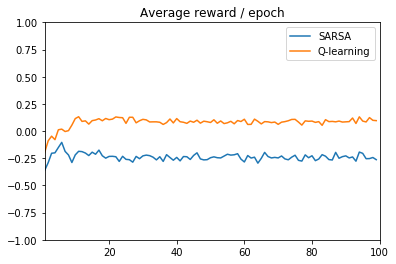

In [7]:
# グラフ：エポック当たり平均reward
def draw_average_reward_per_epoch_graph(full_records, title="Average reward / epoch"):
    agent_num = len(full_records)
    epoch_num = len(full_records[0][0])
    episode_num = len(full_records[0][0][0])
    full_records = np.array(full_records)
    
    for agent in range(agent_num):
        x = np.array(range(epoch_num))
        
        # for debug
        #print("x", x)
        #print("draw average, full_records[agent][0] = ",full_records[agent][0])
        #print("np.average, axis=1 ",np.average(full_records[agent][0], axis=1))
        
        y = np.average(full_records[agent][0], axis=1)
        plt.plot(x,y, label=["SARSA","Q-learning"][agent])
        
    plt.legend()
    plt.title(title)
    plt.xlim(1, epoch_num)
    plt.ylim(-1, 1)
    

draw_average_reward_per_epoch_graph(full_records)

In [8]:
sarsa_q_dataframe = pd.DataFrame(np.round(full_records[0][1][0], 3))
sarsa_q_dataframe.columns = ['up(0,-1)', 'right(1,0)', 'down(0,1)', 'left(-1,0)']
sarsa_q_dataframe.index = range(16)
print("Agent SARSA's Q-table")
sarsa_q_dataframe.head(16)

Agent SARSA's Q-table


,"up(0,-1)","right(1,0)","down(0,1)","left(-1,0)"
0,0.000,-0.672,-0.788,-0.663
1,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000
3,0.000,-0.312,-0.375,-0.309
4,0.078,0.441,0.050,0.167
5,-0.641,0.000,-0.642,-0.784
6,-0.315,-0.373,-0.308,0.000
7,0.844,0.839,0.366,0.630
8,-0.759,-0.286,0.000,-0.403
9,0.000,-0.250,-0.320,-0.247


In [9]:
ql_q_dataframe = pd.DataFrame(np.round(full_records[1][1][0], 3))
ql_q_dataframe.columns = ['up(0,-1)', 'right(1,0)', 'down(0,1)', 'left(-1,0)']
ql_q_dataframe.index = range(16)
print("Agent Q-learning's Q-table")
ql_q_dataframe.head(16)

Agent Q-learning's Q-table


,"up(0,-1)","right(1,0)","down(0,1)","left(-1,0)"
0,0.000,-0.485,-0.492,-0.482
1,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000
3,0.000,-0.002,-0.000,-0.001
4,0.547,0.474,0.412,0.535
5,-0.003,0.000,-0.002,-0.002
6,-0.001,-0.001,-0.001,0.000
7,0.509,0.756,0.681,0.804
8,-0.003,-0.001,0.000,-0.004
9,0.000,-0.004,-0.004,-0.002
